# R - FEATURE SELECTION : 
#### SELECT IMPORTANT VARIABLES WITH BORUTA PACKAGE

Priyaranjan Mohanty

Variable Selection is an important step in a predictive modeling project. It is also called 'Feature Selection'.

Due to abundance of available data , most of the time we have too many predictors for a predictive model. 

But not every variable is important for prediction of a particular task. 

Hence it is essential to identify important variables and remove redundant variables. 

Before building a predictive model, it is generally not known about the exact list of important variable which returns accurate and robust model.

### Why Variable Selection is important?

1) Removing a redundant variable helps to improve accuracy. Similarly, inclusion of a relevant variable has a positive effect on model accuracy.

2) Too many variables might result to overfitting which means model is not able to generalize pattern

3) Too many variables leads to slow computation which in turns requires more memory and hardware.

### Why Boruta Package?

There are a lot of packages for feature selection in R. The question arises " What makes boruta package so special".  

Following are the reasons to use boruta package for feature selection.

1) It works well for both classification and regression problem.

2) It takes into account multi-variable relationships.

3) It is an improvement on random forest variable importance measure which is a very popular method for variable selection.

4) It follows an all-relevant variable selection method in which it considers all features which are relevant to the outcome variable. Whereas, most of the other variable selection algorithms follow a minimal optimal method where they rely on a small subset of features which yields a minimal error on a chosen classifier.

5) It can handle interactions between variables

6) It can deal with fluctuating nature of random a random forest importance measure

In [15]:
install.packages("Boruta" , dependencies=TRUE ,repos='http://cran.rstudio.com/')

Installing package into 'C:/Users/itzpr/OneDrive/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
also installing the dependencies 'rFerns', 'xgboost'



package 'rFerns' successfully unpacked and MD5 sums checked
package 'xgboost' successfully unpacked and MD5 sums checked
package 'Boruta' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\itzpr\AppData\Local\Temp\Rtmp8IqGWs\downloaded_packages


In [16]:
require(dplyr)

require(Boruta)

Loading required package: Boruta
Warning message:
"package 'Boruta' was built under R version 3.5.3"Loading required package: ranger
Warning message:
"package 'ranger' was built under R version 3.5.3"

In [5]:
#Read data

df = read.csv("https://stats.idre.ucla.edu/stat/data/binary.csv")


In [6]:
#Column Names
names(df)

[1] "admit" "gre"   "gpa"   "rank"

In [8]:
glimpse(df)

Observations: 400
Variables: 4
$ admit <int> 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0...
$ gre   <int> 380, 660, 800, 640, 520, 760, 560, 400, 540, 700, 800, 440, 7...
$ gpa   <dbl> 3.61, 3.67, 4.00, 3.19, 2.93, 3.00, 2.98, 3.08, 3.39, 3.92, 4...
$ rank  <int> 3, 3, 1, 4, 4, 2, 1, 2, 3, 2, 4, 1, 1, 2, 1, 3, 4, 3, 2, 1, 3...


In [10]:
# Define Categorical Variables

df$admit = as.factor(df$admit)
df$rank = as.factor(df$rank)

In [11]:
glimpse(df)

Observations: 400
Variables: 4
$ admit <fct> 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0...
$ gre   <int> 380, 660, 800, 640, 520, 760, 560, 400, 540, 700, 800, 440, 7...
$ gpa   <dbl> 3.61, 3.67, 4.00, 3.19, 2.93, 3.00, 2.98, 3.08, 3.39, 3.92, 4...
$ rank  <fct> 3, 3, 1, 4, 4, 2, 1, 2, 3, 2, 4, 1, 1, 2, 1, 3, 4, 3, 2, 1, 3...


In [12]:
#Summarize Data
summary(df) 

#Check number of missing values
sapply(df, function(y) sum(is.na(y)))

 admit        gre             gpa        rank   
 0:273   Min.   :220.0   Min.   :2.260   1: 61  
 1:127   1st Qu.:520.0   1st Qu.:3.130   2:151  
         Median :580.0   Median :3.395   3:121  
         Mean   :587.7   Mean   :3.390   4: 67  
         3rd Qu.:660.0   3rd Qu.:3.670          
         Max.   :800.0   Max.   :4.000          

admit   gre   gpa  rank 
    0     0     0     0

 1. run of importance source...
 2. run of importance source...
 3. run of importance source...
 4. run of importance source...
 5. run of importance source...
 6. run of importance source...
 7. run of importance source...
 8. run of importance source...
 9. run of importance source...
After 9 iterations, +1.3 secs: 
 confirmed 3 attributes: gpa, gre, rank;
 no more attributes left.



Boruta performed 9 iterations in 1.291652 secs.
 3 attributes confirmed important: gpa, gre, rank;
 No attributes deemed unimportant.


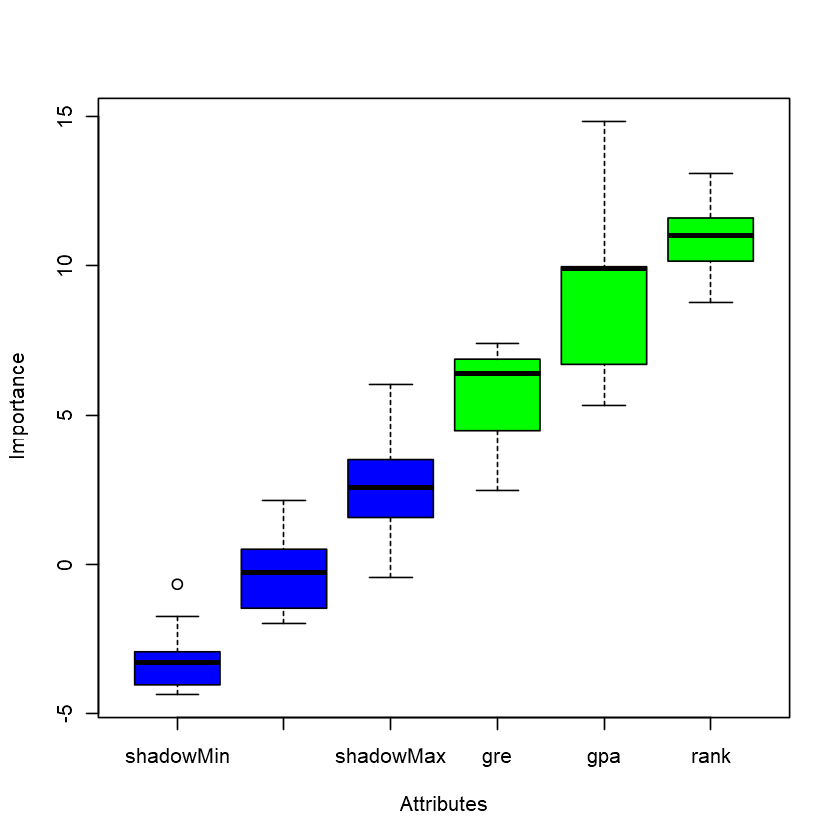

In [17]:
# Run Boruta Algorithm
set.seed(456)

boruta <- Boruta(admit~., data = df, doTrace = 2)

print(boruta)

plot(boruta)

Above shows all the three variables are considered important and no one is tagged 'unimportant'. The plot() option shows box plot of all the attributes plus minimum, average and max shadow score. Variables having boxplot in green shows all predictors are important. If boxplots are in red, it shows they are rejected. And yellow color of box plot indicates they are tentative.

### Let's add some irrelevant data to our original dataset to check the importance

In [18]:
#Add some random permuted data
set.seed(777)

df.new<-data.frame(df,apply(df[,-1],2,sample))

names(df.new)[5:7]<-paste("Random",1:3,sep="")

df.new$Random1 = as.numeric(as.character(df.new$Random1))
df.new$Random2 = as.numeric(as.character(df.new$Random2))

### Lets run Boruta algorithm again with this new DataFrame

After 10 iterations, +1.4 secs: 
 confirmed 2 attributes: gpa, rank;
 rejected 1 attribute: Random1;
 still have 3 attributes left.

After 17 iterations, +2.2 secs: 
 confirmed 1 attribute: gre;
 still have 2 attributes left.

After 20 iterations, +2.5 secs: 
 rejected 1 attribute: Random3;
 still have 1 attribute left.

After 55 iterations, +6.6 secs: 
 rejected 1 attribute: Random2;
 no more attributes left.



Boruta performed 55 iterations in 6.573424 secs.
 3 attributes confirmed important: gpa, gre, rank;
 3 attributes confirmed unimportant: Random1, Random2, Random3;


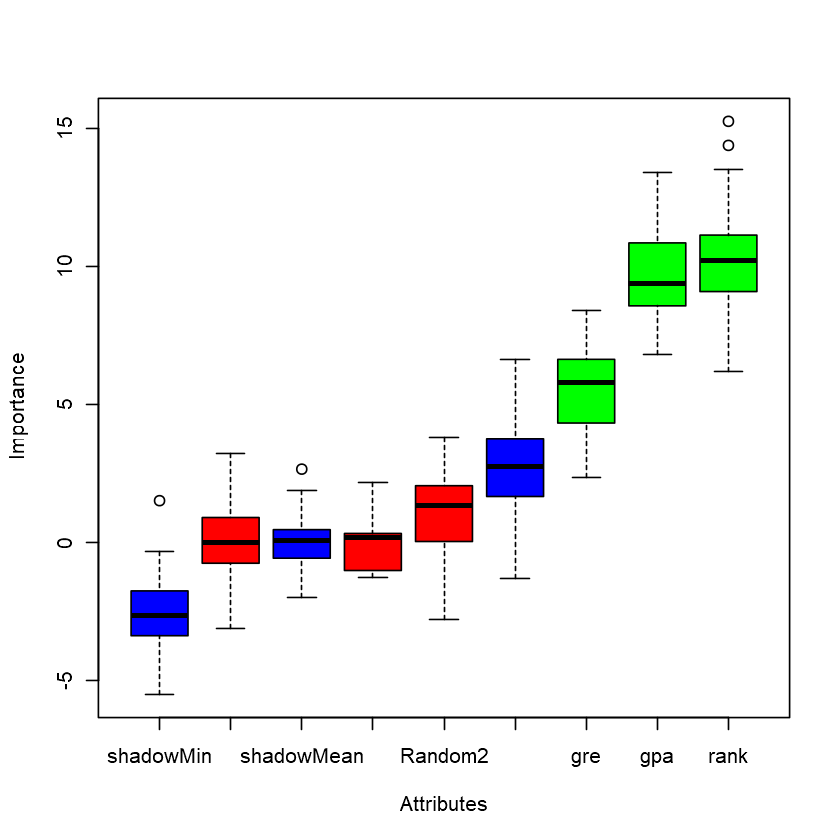

In [19]:
set.seed(456)

boruta2 <- Boruta(admit~., data = df.new, doTrace = 1)

print(boruta2)

plot(boruta2)

The irrelevant variable we added to the dataset came out unimportant as per boruta algorithm.

In [21]:
#See list of finalvars

finalvars = getSelectedAttributes(boruta2, withTentative = F)

finalvars

[1] "gre"  "gpa"  "rank"

Thank You & Happy Learning !!